In [5]:
import altair as alt
import janitor
import pandas as pd
import numpy as np

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [6]:
df = pd.read_csv("../data/WHO_life_expectancy_data.csv")
df = janitor.clean_names(df)

In [7]:
df.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv_aids,gdp,population,_thinness_1_19_years,_thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy_                   2928 non-null float64
adult_mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2385 non-null float64
measles_                           2938 non-null int64
_bmi_                              2904 non-null float64
under_five_deaths_                 2938 non-null int64
polio                              2919 non-null float64
total_expenditure                  2712 non-null float64
diphtheria_                        2919 non-null float64
_hiv_aids                          2938 non-null

## Life Expectancy Over Time

In [20]:
def df_over_time(df, x, y, colour):
    selected_cols = [x] + [y] + [colour]
    print(selected_cols)
    df = (
        df[selected_cols]
            .groupby([x] + [colour])
            .agg(np.mean)
            .reset_index(drop=False)
    )

    return df

df_over_time(df, "year", "life_expectancy_", "status").head()

['year', 'life_expectancy_', 'status']


,year,status,life_expectancy_
0,2000,Developed,76.803125
1,2000,Developing,64.619868
2,2001,Developed,77.128125
3,2001,Developing,65.009934
4,2002,Developed,77.546875


['year', 'life_expectancy_', 'status']


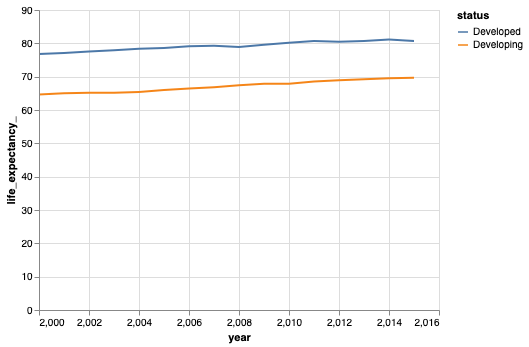

In [22]:
alt.Chart(
    df_over_time(df, "year", "life_expectancy_", "status")
).mark_line(
).encode(
    alt.X("year"),
    alt.Y("life_expectancy_"),
    alt.Color("status")
)

In [24]:
df["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [26]:
country_list = ['Afghanistan', 'Albania', 'Algeria', 'Angola']

In [30]:
df[df["country"].isin(country_list)]

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv_aids,gdp,population,_thinness_1_19_years,_thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Angola,2004,Developing,47.1,386.0,94,3.53,8.866777,NaN,29,...,4.0,4.71,4.0,2.5,141.868440,18865716.0,1.2,1.1,0.415,6.4
60,Angola,2003,Developing,46.8,388.0,95,3.49,35.933491,NaN,1196,...,4.0,4.41,4.0,2.4,779.468356,1823369.0,1.4,1.3,0.406,5.9
61,Angola,2002,Developing,46.5,391.0,96,2.82,24.037942,NaN,11945,...,37.0,3.63,41.0,2.3,711.181716,17572649.0,1.5,1.5,0.401,5.5
62,Angola,2001,Developing,45.7,44.0,97,2.58,30.359936,NaN,9046,...,41.0,5.38,38.0,2.1,526.168743,16983266.0,1.7,1.7,0.391,5.1


In [84]:
# https://stackoverflow.com/questions/41453325/python-pandas-groupby-calculate-change

df_tidy = df[["life_expectancy_", "year", "country"]]
df_tidy = (
    df_tidy
        .sort_values(by=["country", "year"])
        .groupby(["country", "year"])
        .agg([np.mean])
        .collapse_levels()
        .reset_index()
)

# df_tidy["change_in_life_expectancy"] = df_tidy["life_expectancy_"] - df_tidy["life_expectancy_"].shift(1, axis=0) 
#
# df_tidy["change_in_life_expectancy"] = df_tidy["life_expectancy__mean"].pct_change(fill_method=None) 

change_in_life_expectancy = (
    df_tidy
        .set_index(["year", "country"])
        .groupby("country")
        .pct_change()
        .reset_index(drop=True)
)

# change_in_life_expectancy

df_tidy["change_in_life_expectancy"] = change_in_life_expectancy.round(2)




df_tidy.head(50)

,country,year,life_expectancy__mean,change_in_life_expectancy
0,Afghanistan,2000,54.8,NaN
1,Afghanistan,2001,55.3,0.01
2,Afghanistan,2002,56.2,0.02
3,Afghanistan,2003,56.7,0.01
4,Afghanistan,2004,57.0,0.01
5,Afghanistan,2005,57.3,0.01
6,Afghanistan,2006,57.3,0.00
7,Afghanistan,2007,57.5,0.00
8,Afghanistan,2008,58.1,0.01
9,Afghanistan,2009,58.6,0.01


In [102]:
# https://stackoverflow.com/questions/41453325/python-pandas-groupby-calculate-change

df_tidy = df[["life_expectancy_", "year", "country"]]
df_tidy = (
    df_tidy
        .sort_values(by=["country", "year"])
        .groupby(["country", "year"])
        .agg([np.mean])
#         .collapse_levels()
        .reset_index()
)

# df_tidy["change_in_life_expectancy"] = df_tidy["life_expectancy_"] - df_tidy["life_expectancy_"].shift(1, axis=0) 
#
# df_tidy["change_in_life_expectancy"] = df_tidy["life_expectancy__mean"].pct_change(fill_method=None) 

change_in_life_expectancy = (
    df_tidy
        .set_index(["year", "country"])
        .groupby("country")
        .pct_change()
        .reset_index(drop=True)
)

# change_in_life_expectancy

df_tidy["change_in_life_expectancy"] = change_in_life_expectancy.round(2)



# df_tidy.head(50)
df_tidy[df_tidy.country == 'Antigua and Barbuda']
# df_tidy.info()

,country,year,life_expectancy_,change_in_life_expectancy
,,,mean,
64,Antigua and Barbuda,2000,73.6,NaN
65,Antigua and Barbuda,2001,73.8,0.0
66,Antigua and Barbuda,2002,74.0,0.0
67,Antigua and Barbuda,2003,74.2,0.0
68,Antigua and Barbuda,2004,74.4,0.0
69,Antigua and Barbuda,2005,74.6,0.0
70,Antigua and Barbuda,2006,74.8,0.0
71,Antigua and Barbuda,2007,75.0,0.0
72,Antigua and Barbuda,2008,75.2,0.0


In [96]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 4 columns):
(country, )                      2938 non-null object
(year, )                         2938 non-null int64
(life_expectancy_, mean)         2928 non-null float64
(change_in_life_expectancy, )    2745 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 91.9+ KB


In [87]:
df_tidy["life_expectancy_"]

,mean
0,54.8
1,55.3
2,56.2
3,56.7
4,57.0
...,...
2933,54.9
2934,56.6
2935,58.0
2936,59.2


In [103]:
df_tidy[df_tidy.country == 'Canada']

,country,year,life_expectancy_,change_in_life_expectancy
,,,mean,
480,Canada,2000,79.1,NaN
481,Canada,2001,79.4,0.00
482,Canada,2002,79.5,0.00
483,Canada,2003,79.7,0.00
484,Canada,2004,80.0,0.00
485,Canada,2005,81.0,0.01
486,Canada,2006,85.0,0.05
487,Canada,2007,85.0,0.00
488,Canada,2008,87.0,0.02


In [106]:
df[df.country == 'United States of America']

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv_aids,gdp,population,_thinness_1_19_years,_thinness_5_9_years,income_composition_of_resources,schooling
2794,United States of America,2015,Developed,79.3,13.0,23,NaN,0.0,92.0,188,...,93.0,NaN,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2795,United States of America,2014,Developed,79.1,14.0,23,8.82,0.0,92.0,667,...,93.0,17.14,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2796,United States of America,2013,Developed,78.9,16.0,23,8.82,0.0,91.0,187,...,93.0,16.90,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2797,United States of America,2012,Developed,78.8,16.0,24,8.82,0.0,9.0,55,...,93.0,17.20,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2798,United States of America,2011,Developed,78.7,16.0,25,8.67,0.0,91.0,220,...,94.0,17.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2799,United States of America,2010,Developed,78.7,15.0,25,8.55,0.0,92.0,63,...,93.0,17.20,95.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2800,United States of America,2009,Developed,78.5,18.0,26,8.71,0.0,92.0,71,...,93.0,17.00,95.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2801,United States of America,2008,Developed,78.2,18.0,27,8.74,0.0,94.0,140,...,94.0,16.20,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2802,United States of America,2007,Developed,78.1,11.0,27,8.74,0.0,93.0,43,...,93.0,15.57,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2803,United States of America,2006,Developed,77.8,113.0,28,8.63,0.0,93.0,55,...,93.0,15.27,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN


In [107]:
# PLOT 1 - life expectancy over time
def make_plot_01(df, x, y, colour):
    
    # tidy data frame
    selected_cols = ["year"] + ["life_expectancy_"] + [colour]
    df = (
        df[selected_cols]
            .sort_values(by=[colour, "year"])
            .groupby([colour, "year"])
            .agg(np.mean)
            .reset_index(drop=False)
    )

    # calculate change in life expectancy
    change_in_life_expectancy = (
        df
        .set_index(["year", colour])
        .groupby(colour)
        .pct_change()
        .reset_index(drop=True)
    )
    df["change_in_life_expectancy_"] = change_in_life_expectancy.round(2)

    # create chart
    fig = alt.Chart(
            df
        ).mark_line(
            point=True
        ).encode(
            alt.X(x + ":N", axis=alt.Axis(labelAngle=45)),
            alt.Y(y),
            alt.Color(colour),
            tooltip=[
                alt.Tooltip("life_expectancy_", title="Life Expectancy"),
                alt.Tooltip("change_in_life_expectancy_", title="Change in Life Expectancy")
            ]
        )

    return df

In [108]:
make_plot_01(df, "year", "change_in_life_expectancy_", "status")

,status,year,life_expectancy_,change_in_life_expectancy_
0,Developed,2000,76.803125,NaN
1,Developed,2001,77.128125,0.00
2,Developed,2002,77.546875,0.01
3,Developed,2003,77.940625,0.01
4,Developed,2004,78.384375,0.01
5,Developed,2005,78.590625,0.00
6,Developed,2006,79.131250,0.01
7,Developed,2007,79.300000,0.00
8,Developed,2008,78.931250,-0.00
9,Developed,2009,79.584375,0.01
